In [2]:
import numpy as np
import pandas as pd

# Load the CSV
data = pd.read_csv("fruit.csv")

# Separate features and labels
X = data[["length_cm", "weight_g", "yellow_score"]].values
y = data["label"].values.reshape(-1, 1)  # shape (n, 1)

# Normalize features (optional but helps)
X = (X - X.mean(axis=0)) / X.std(axis=0)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (12, 3)
Labels shape: (12, 1)


In [3]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-9  # to avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


In [4]:
# Set random seed for reproducibility
np.random.seed(42)

n_samples, n_features = X.shape

# Initialize weights and bias
W = np.random.randn(n_features, 1)
b = 0.0

# Hyperparameters
learning_rate = 0.1
epochs = 500


In [5]:
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    Z = np.dot(X, W) + b
    y_pred = sigmoid(Z)

    # Compute loss
    loss = binary_cross_entropy(y, y_pred)
    loss_history.append(loss)

    # Accuracy
    predictions = (y_pred >= 0.5).astype(int)
    acc = np.mean(predictions == y)
    accuracy_history.append(acc)

    # Backward pass (gradients)
    dW = np.dot(X.T, (y_pred - y)) / n_samples
    db = np.mean(y_pred - y)

    # Update weights
    W -= learning_rate * dW
    b -= learning_rate * db

    # Early stop if loss is low
    if loss < 0.05:
        print(f"Early stop at epoch {epoch}, loss: {loss:.4f}")
        break

print("✅ Training complete")


Early stop at epoch 110, loss: 0.0499
✅ Training complete


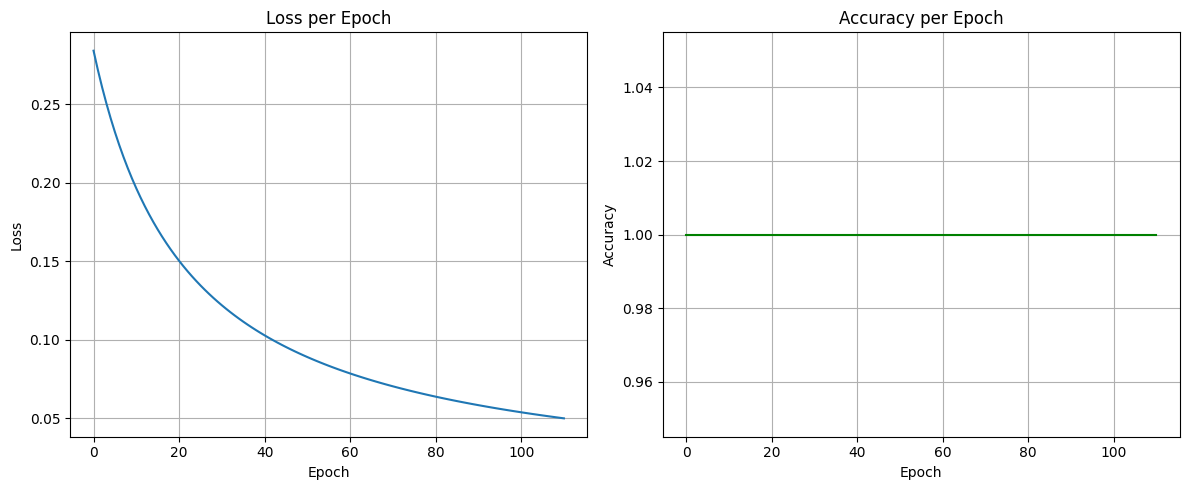

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.grid(True)

plt.tight_layout()
plt.show()
